# Product comparison

![header](../figures/logos_partenaires_DC_WOC-ESA.jpg)


***
**Authors:** Datlas <br>
**Copyright:** 2023 Datlas <br>
**License:** MIT

<br>

<br>


<div class="alert alert-block alert-success">
<h1><center> <u> Gulf Stream results </u> </center></h1>  
    


<div class="alert alert-block alert-success"> 
 <h5><center> The notebook aims to evaluate the surface current for all products in the Gulf Stream region.</center></h5> 

## <u> Compared products </u> 

<h3>
    <ul>  
        <li> GlobCurrent Geostrophic </li> 
        <li> GlobCurrent Total </li>
        <li> WOC SST-SSH </li>
        <li> WOC inertial global </li>
        <li> WOC Omega-3D  </li>
        <li> WOC inertial (North Atlantic)  </li>
    </ul>  

</h3>
  

In [1]:
from glob import glob
import numpy as np
import os
import sys 
sys.path.append('../')
import warnings
import datetime
warnings.filterwarnings("ignore") 

In [2]:
import velocity_metrics.spectrum.spectrum as spectrum
import velocity_metrics.lagrangian.drifters as drifters
import velocity_metrics.utils.constant as const 
import velocity_metrics.eulerian.eulerian_drifters as eulerian 
import velocity_metrics.lagrangian.cumulative_distance as sde
import velocity_metrics.fronts.compare_fronts_vel as compare_fronts_vel
import velocity_metrics.fronts.box_metrics as box_metrics

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [3]:
from src import utils

In [4]:

outputdir = '../results/'


<br>

<br>

## <u> 1. Spectrum </u> 

In [5]:
dir_spectrum = '../dc_data/DC_product_evaluation/spectrum/'


<br>

<h2>At 0m</h2>

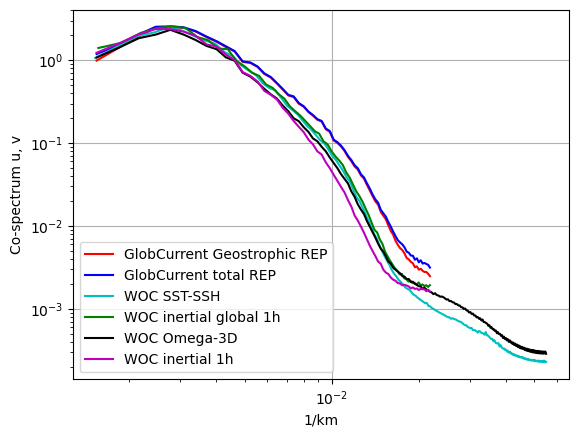

In [6]:
name_plot = 'Spectrum_GulfStream_0.png'


list_spectrum_pickles = [dir_spectrum+'spectrum_008_047_region_GulfStream_0.pyo',
                         dir_spectrum+'spectrum_015_004_region_GulfStream_0.pyo',
                         dir_spectrum+'spectrum_woc-l4-cur-natl2d_rep-1d_region_GulfStream_0.pyo',
                         dir_spectrum+'spectrum_woc-l4-cureul-glob-1h_region_GulfStream_0.pyo',
                         dir_spectrum+'spectrum_woc-l4-cur-natl3d_rep-1d_region_GulfStream_0.pyo',
                         dir_spectrum+'spectrum_woc-l4-cureul-natl-1h_region_GulfStream_0.pyo']

_ = spectrum.plot(list_spectrum_pickles,
                      outfile=outputdir+name_plot,
                      list_color=['r','b','c','g','k','m'])

<br>


<h2>At 15m</h2>

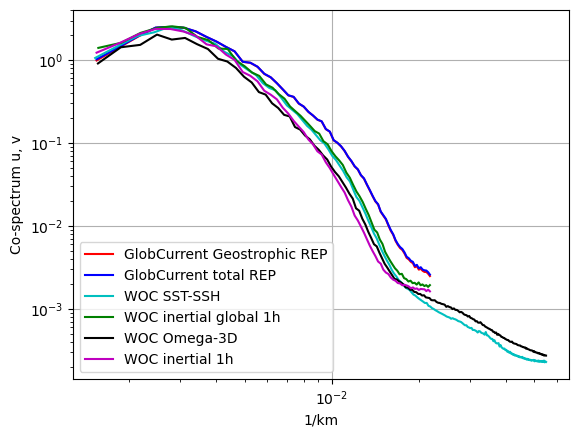

In [7]:
name_plot = 'Spectrum_GulfStream_1.png'


list_spectrum_pickles = [dir_spectrum+'spectrum_008_047_region_GulfStream_1.pyo',
                         dir_spectrum+'spectrum_015_004_region_GulfStream_1.pyo',
                         dir_spectrum+'spectrum_woc-l4-cur-natl2d_rep-1d_region_GulfStream_1.pyo',
                         dir_spectrum+'spectrum_woc-l4-cureul-glob-1h_region_GulfStream_1.pyo',
                         dir_spectrum+'spectrum_woc-l4-cur-natl3d_rep-1d_region_GulfStream_1.pyo',
                         dir_spectrum+'spectrum_woc-l4-cureul-natl-1h_region_GulfStream_1.pyo']


_ = spectrum.plot(list_spectrum_pickles,
                      outfile=outputdir+name_plot,
                      list_color=['r','b','c','g','k','m'])

<br>

<br>

## <u> 2. Eulerian RMS </u>

<br>

<h2>At 0m</h2>

<br>

<h3>Mean error</h3>

In [8]:
dir_eulerian = '../dc_data/DC_product_evaluation/eulerian_rms/'

In [9]:

list_dict = [{'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_GulfStream_008_047_00/Eulerian_RMS_008_047.pyo','name':'GlobCurrent Geostrophic'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_GulfStream_cmems_015_004_00/Eulerian_RMS_015_004.pyo','name':'GlobCurrent Total'}, 
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_GulfStream_woc-l4-cur-natl2d_rep-1d_00/Eulerian_RMS_woc-l4-cur-natl2d_rep-1d.pyo','name':'WOC SST-SSH'}, 
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_GulfStream_woc-l4-cureul-glob-1h_00/Eulerian_RMS_woc-l4-cureul-glob-1h.pyo','name':'WOC inertial global 1h'}, 
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_GulfStream_woc-l4-cur-natl3d_rep-1d_00/Eulerian_RMS_woc-l4-cur-natl3d_rep-1d.pyo','name':'WOC Omega-3D'}, 
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_GulfStream_woc-l4-cureul-natl-1h_00/Eulerian_RMS_woc-l4-cureul-natl-1h.pyo','name':'WOC inertial 1h'}] 

utils.DictTable(list_dict)  

Mean,Norm Quadratic Error (%),Norm Explained Variance (%),Norm Correlation,Norm RMSD,Number of Points
GlobCurrent Geostrophic,40.177,83.118,0.781,0.287,102578.000
GlobCurrent Total,36.575,84.961,0.813,0.262,103022.000
WOC SST-SSH,43.479,81.145,0.750,0.312,93656.000
WOC inertial global 1h,40.345,81.361,0.776,0.289,103008.000
WOC Omega-3D,42.604,79.880,0.757,0.306,93656.000
WOC inertial 1h,41.659,76.780,0.773,0.299,103274.000


<br>

<br>

<h3>Standard deviation error</h3>

In [10]:

list_dict = [{'type_stat':'STD','path':dir_eulerian+'eulerian_rms_GulfStream_008_047_00/Eulerian_STD_008_047.pyo','name':'GlobCurrent Geostrophic'},
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_GulfStream_cmems_015_004_00/Eulerian_STD_015_004.pyo','name':'GlobCurrent Total'}, 
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_GulfStream_woc-l4-cur-natl2d_rep-1d_00/Eulerian_STD_woc-l4-cur-natl2d_rep-1d.pyo','name':'WOC SST-SSH'}, 
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_GulfStream_woc-l4-cureul-glob-1h_00/Eulerian_STD_woc-l4-cureul-glob-1h.pyo','name':'WOC inertial global 1h'}, 
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_GulfStream_woc-l4-cur-natl3d_rep-1d_00/Eulerian_STD_woc-l4-cur-natl3d_rep-1d.pyo','name':'WOC Omega-3D'}, 
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_GulfStream_woc-l4-cureul-natl-1h_00/Eulerian_STD_woc-l4-cureul-natl-1h.pyo','name':'WOC inertial 1h'}]  

utils.DictTable(list_dict,['Direction difference', 'Number of Points'])  

STD,Direction difference,Number of Points
GlobCurrent Geostrophic,42.983,102578.000
GlobCurrent Total,42.638,103022.000
WOC SST-SSH,44.358,93656.000
WOC inertial global 1h,42.984,103008.000
WOC Omega-3D,44.510,93656.000
WOC inertial 1h,43.075,103274.000


<br>

<h2>At 15m</h2>

<br>

<h3>Mean error</h3>

In [11]:

list_dict = [{'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_GulfStream_008_047_15/Eulerian_RMS_008_047.pyo','name':'GlobCurrent Geostrophic'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_GulfStream_cmems_015_004_15/Eulerian_RMS_015_004.pyo','name':'GlobCurrent Total'}, 
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_GulfStream_woc-l4-cur-natl2d_rep-1d_15/Eulerian_RMS_woc-l4-cur-natl2d_rep-1d.pyo','name':'WOC SST-SSH'}, 
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_GulfStream_woc-l4-cureul-glob-1h_15/Eulerian_RMS_woc-l4-cureul-glob-1h.pyo','name':'WOC inertial global 1h'}, 
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_GulfStream_woc-l4-cur-natl3d_rep-1d_15/Eulerian_RMS_woc-l4-cur-natl3d_rep-1d.pyo','name':'WOC Omega-3D'}, 
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_GulfStream_woc-l4-cureul-natl-1h_15/Eulerian_RMS_woc-l4-cureul-natl-1h.pyo','name':'WOC inertial 1h'}] 

utils.DictTable(list_dict)  

Mean,Norm Quadratic Error (%),Norm Explained Variance (%),Norm Correlation,Norm RMSD,Number of Points
GlobCurrent Geostrophic,52.787,90.749,0.630,0.266,49819.000
GlobCurrent Total,51.551,89.859,0.639,0.260,50016.000
WOC SST-SSH,57.433,88.037,0.571,0.286,43880.000
WOC inertial global 1h,52.508,88.759,0.619,0.265,50016.000
WOC Omega-3D,57.558,81.021,0.558,0.287,43880.000
WOC inertial 1h,52.616,84.120,0.619,0.268,50176.000


<br>

<br>

<h3>Standard deviation error</h3>

In [12]:

list_dict = [{'type_stat':'STD','path':dir_eulerian+'eulerian_rms_GulfStream_008_047_15/Eulerian_STD_008_047.pyo','name':'GlobCurrent Geostrophic'},
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_GulfStream_cmems_015_004_15/Eulerian_STD_015_004.pyo','name':'GlobCurrent Total'}, 
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_GulfStream_woc-l4-cur-natl2d_rep-1d_15/Eulerian_STD_woc-l4-cur-natl2d_rep-1d.pyo','name':'WOC SST-SSH'}, 
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_GulfStream_woc-l4-cureul-glob-1h_15/Eulerian_STD_woc-l4-cureul-glob-1h.pyo','name':'WOC inertial global 1h'}, 
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_GulfStream_woc-l4-cur-natl3d_rep-1d_15/Eulerian_STD_woc-l4-cur-natl3d_rep-1d.pyo','name':'WOC Omega-3D'}, 
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_GulfStream_woc-l4-cureul-natl-1h_15/Eulerian_STD_woc-l4-cureul-natl-1h.pyo','name':'WOC inertial 1h'}]  

utils.DictTable(list_dict,['Direction difference', 'Number of Points'])  

STD,Direction difference,Number of Points
GlobCurrent Geostrophic,42.956,49819.000
GlobCurrent Total,42.721,50016.000
WOC SST-SSH,43.550,43880.000
WOC inertial global 1h,43.052,50016.000
WOC Omega-3D,43.676,43880.000
WOC inertial 1h,43.020,50176.000


<br>

<br>

## <u> 3. Lagrangian Cumulative Distance</u> 

In [13]:

dir_sde = '../dc_data/DC_product_evaluation/cumulative_distance/'


<br>

<h2>At 0m</h2>

<Figure size 640x480 with 0 Axes>

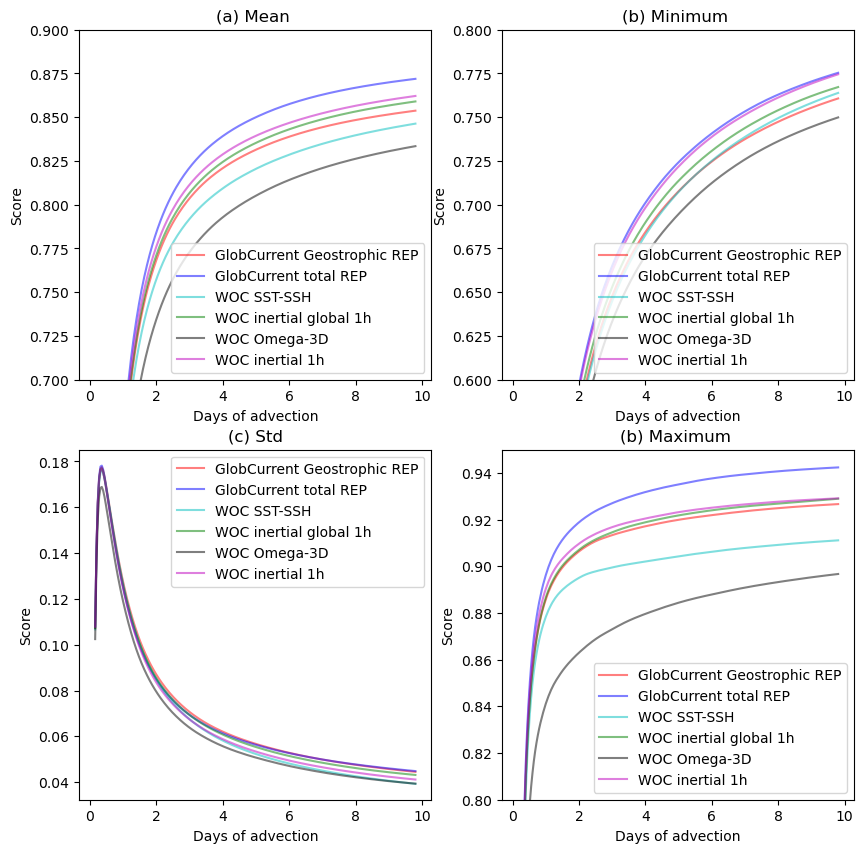

In [14]:


all_outputfilename = ['GulfStream_008_047_00/Sde_008_047_15m.pyo.gz',
                      'GulfStream_cmems_015_004_00/Sde_015_004_00m.pyo.gz',
                      'GulfStream_woc-l4-cur-natl2d_rep-1d_00/Sde_woc-l4-cur-natl2d_rep-1d_00m.pyo.gz', 
                      'GulfStream_woc-l4-cureul-glob-1h_00/Sde_woc-l4-cureul-glob-1h_15m.pyo.gz',
                      'GulfStream_woc-l4-cur-natl3d_rep-1d_00/Sde_woc-l4-cur-natl3d_rep-1d_01m.pyo.gz',
                      'GulfStream_woc-l4-cureul-natl-1h_00/Sde_woc-l4-cureul-natl-1h_15m.pyo.gz'  ]

list_sde = [dir_sde + output_filename for output_filename in all_outputfilename]

outputfilename = 'SDE_region_GulfStream_00m.png'

_ = sde.plot(list_sde, output_dir=outputdir, 
             output_filename=outputfilename,
             list_color=['r','b','c','g','k','m'],
             plot_range={'mean': (0.7, 0.9), 'max': (0.8, 0.95), 'min': (0.6, 0.8)})

<br>

<h2>At 15m</h2>

<Figure size 640x480 with 0 Axes>

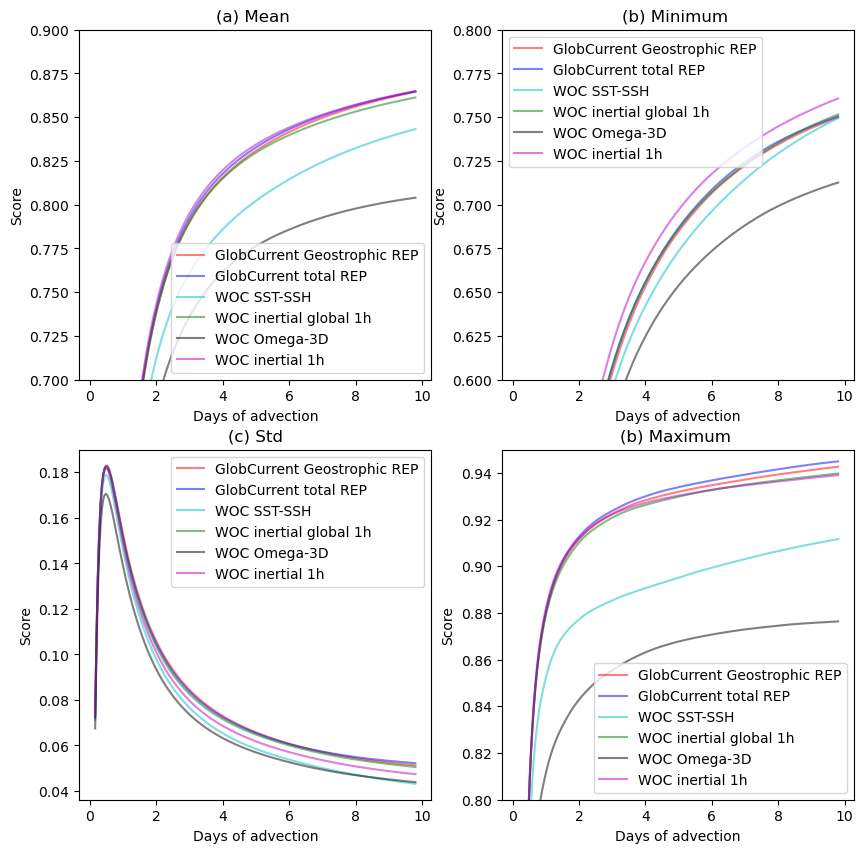

In [15]:
 

all_outputfilename = ['GulfStream_008_047_15/Sde_008_047_15m.pyo.gz',
                      'GulfStream_cmems_015_004_15/Sde_015_004_15m.pyo.gz', 
                      'GulfStream_woc-l4-cur-natl2d_rep-1d_15/Sde_woc-l4-cur-natl2d_rep-1d_00m.pyo.gz', 
                      'GulfStream_woc-l4-cureul-glob-1h_15/Sde_woc-l4-cureul-glob-1h_15m.pyo.gz',
                      'GulfStream_woc-l4-cur-natl3d_rep-1d_15/Sde_woc-l4-cur-natl3d_rep-1d_16m.pyo.gz',
                      'GulfStream_woc-l4-cureul-natl-1h_15/Sde_woc-l4-cureul-natl-1h_15m.pyo.gz' ]

list_sde = [dir_sde + output_filename for output_filename in all_outputfilename]

outputfilename = 'SDE_region_GulfStream_15m.png'

_ = sde.plot(list_sde, output_dir=outputdir, 
             output_filename=outputfilename, 
             list_color=['r','b','c','g','k','m'],
             plot_range={'mean': (0.7, 0.9), 'max': (0.8, 0.95), 'min': (0.6, 0.8)})

In [16]:
# Save results as a markdown file

! jupyter nbconvert --output-dir='../results'  nb_wocproducts_Gulfstream.ipynb --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags="['remove_cell', 'other_tag_to_remove']" --to markdown --no-input --no-prompt


[NbConvertApp] Converting notebook nb_wocproducts_Gulfstream.ipynb to markdown
[NbConvertApp] Support files will be in nb_wocproducts_Gulfstream_files/
[NbConvertApp] Making directory ../results/nb_wocproducts_Gulfstream_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Gulfstream_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Gulfstream_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Gulfstream_files
[NbConvertApp] Writing 4660 bytes to ../results/nb_wocproducts_Gulfstream.md
